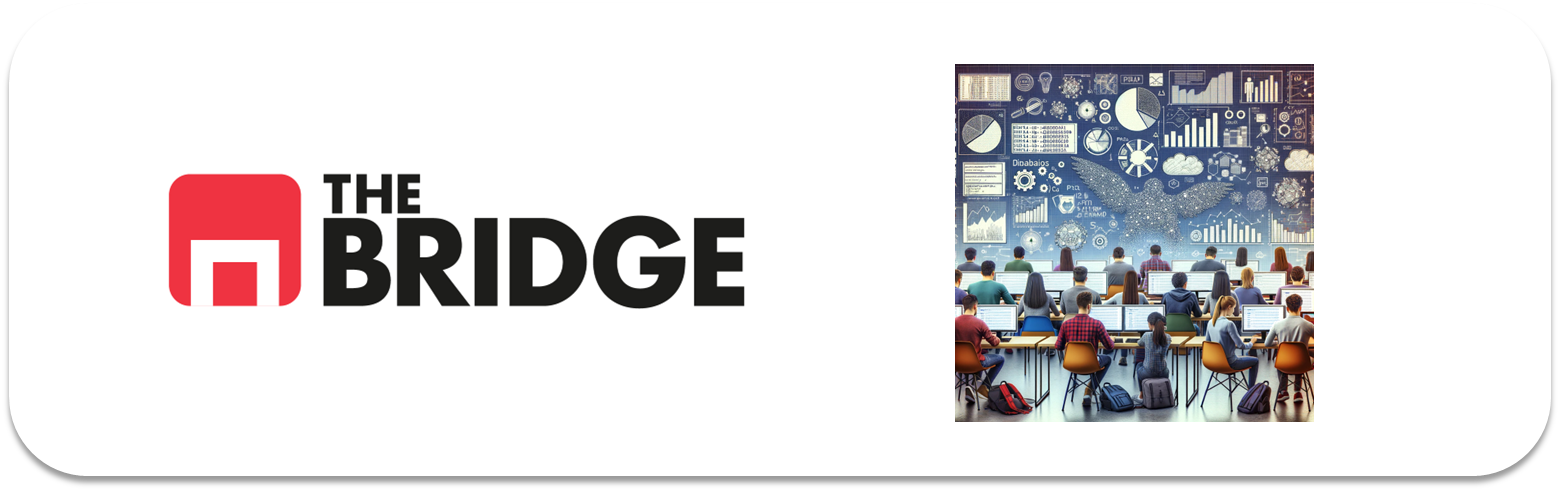

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:
# Cargar el dataset desde un archivo CSV

csv_boston = r"C:\Users\anton\SUBIR_EJERCICIOS_THEBRIDGE\EJERCICIOS_THEBRIDGE\Sprint-10\Obligatoria 1\data\hard_to_find\obligatoria_hard.csv"

df = pd.read_csv(csv_boston, delimiter="|")


# Mostrar las primeras 5 filas del dataset
print(df.head())  

# Mostrar información general sobre las columnas
print(df.info())  

# Obtener estadísticas básicas de las variables numéricas
print(df.describe())  


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO  LSTAT  MEDV  
0     15.3   4.98  24.0  
1     17.8   9.14  21.6  
2     17.8   4.03  34.7  
3     18.7   2.94  33.4  
4     18.7   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    floa

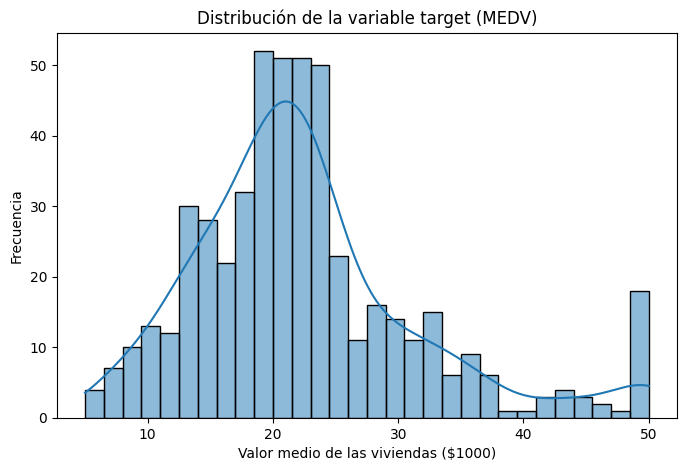

In [9]:
# Crear un histograma con KDE para visualizar la distribución de MEDV
plt.figure(figsize=(8,5))  
sns.histplot(df["MEDV"], bins=30, kde=True)  
plt.xlabel("Valor medio de las viviendas ($1000)")  
plt.ylabel("Frecuencia")  
plt.title("Distribución de la variable target (MEDV)")  
plt.show()

In [10]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=["MEDV"])  # Eliminamos la columna target del conjunto de features
y = df["MEDV"]  # Seleccionamos la variable objetivo

# Dividir el dataset en conjuntos de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Mostrar el tamaño de cada conjunto
print(f"Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")  

Tamaño de entrenamiento: (404, 12), Tamaño de prueba: (102, 12)


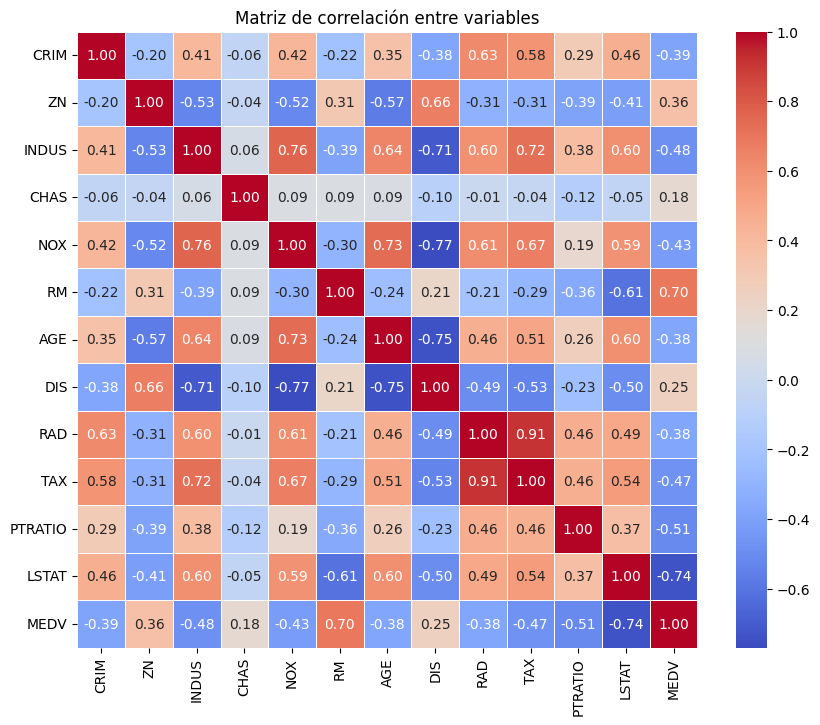

In [11]:
plt.figure(figsize=(10,8))  
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  
plt.title("Matriz de correlación entre variables")  
plt.show()

In [12]:
features_seleccionadas = ["RM", "LSTAT", "PTRATIO", "CRIM", "NOX"]
X_train = X_train[features_seleccionadas]
X_test = X_test[features_seleccionadas]


In [13]:
# Crear el modelo de regresión lineal
modelo = LinearRegression()  

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)  

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)  


In [15]:

# MAE (Error Absoluto Medio)
mae_manual = sum(abs(y_test - y_pred)) / len(y_test)

# MSE (Error Cuadrático Medio)
mse_manual = sum((y_test - y_pred) ** 2) / len(y_test)

# RMSE (Raíz del Error Cuadrático Medio)
rmse_manual = np.sqrt(mse_manual)

# R² (Coeficiente de Determinación)
y_mean = sum(y_test) / len(y_test)  # Media de y_test
ss_total = sum((y_test - y_mean) ** 2)  # Suma total de cuadrados
ss_residual = sum((y_test - y_pred) ** 2)  # Suma de errores cuadráticos
r2_manual = 1 - (ss_residual / ss_total)

# Mostrar Resultados
print(f"MAE (manual): {mae_manual:.2f}")
print(f"MSE (manual): {mse_manual:.2f}")
print(f"RMSE (manual): {rmse_manual:.2f}")
print(f"R² (manual): {r2_manual:.2f}")



MAE (manual): 3.37
MSE (manual): 27.94
RMSE (manual): 5.29
R² (manual): 0.62


In [16]:
from sklearn.linear_model import Ridge  

# Probar distintos valores de alpha
alphas = [0.1, 1, 10]  

for alpha in alphas:
    modelo_ridge = Ridge(alpha=alpha)
    modelo_ridge.fit(X_train, y_train)
    y_pred_ridge = modelo_ridge.predict(X_test)
    
    # Calcular métricas
    mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    print(f"Ridge Regression (alpha={alpha}):")
    print(f"MAE: {mae_ridge:.2f}, R2: {r2_ridge:.2f}")
    print("-" * 50)


Ridge Regression (alpha=0.1):
MAE: 3.37, R2: 0.62
--------------------------------------------------
Ridge Regression (alpha=1):
MAE: 3.37, R2: 0.62
--------------------------------------------------
Ridge Regression (alpha=10):
MAE: 3.37, R2: 0.62
--------------------------------------------------


In [17]:


# Lista de valores de alpha a probar
alphas = [0.1, 1, 10]

# Diccionario para almacenar resultados
resultados_ridge = {}

for alpha in alphas:
    modelo_ridge = Ridge(alpha=alpha)  # Crear modelo con regularización L2
    modelo_ridge.fit(X_train, y_train)  # Entrenar modelo
    
    # Hacer predicciones
    y_pred_ridge = modelo_ridge.predict(X_test)
    
    # Calcular métricas manualmente
    mae_ridge = sum(abs(y_test - y_pred_ridge)) / len(y_test)
    mse_ridge = sum((y_test - y_pred_ridge) ** 2) / len(y_test)
    rmse_ridge = np.sqrt(mse_ridge)
    
    y_mean = sum(y_test) / len(y_test)
    ss_total = sum((y_test - y_mean) ** 2)
    ss_residual = sum((y_test - y_pred_ridge) ** 2)
    r2_ridge = 1 - (ss_residual / ss_total)
    
    # Almacenar resultados
    resultados_ridge[alpha] = {
        "MAE": mae_ridge,
        "MSE": mse_ridge,
        "RMSE": rmse_ridge,
        "R2": r2_ridge
    }

# Mostrar los resultados para cada alpha
for alpha, metricas in resultados_ridge.items():
    print(f"Ridge Regression (alpha={alpha}):")
    print(f"  MAE: {metricas['MAE']:.2f}")
    print(f"  MSE: {metricas['MSE']:.2f}")
    print(f"  RMSE: {metricas['RMSE']:.2f}")
    print(f"  R²: {metricas['R2']:.2f}")
    print("-" * 50)


Ridge Regression (alpha=0.1):
  MAE: 3.37
  MSE: 27.93
  RMSE: 5.29
  R²: 0.62
--------------------------------------------------
Ridge Regression (alpha=1):
  MAE: 3.37
  MSE: 27.89
  RMSE: 5.28
  R²: 0.62
--------------------------------------------------
Ridge Regression (alpha=10):
  MAE: 3.37
  MSE: 27.51
  RMSE: 5.24
  R²: 0.62
--------------------------------------------------


✅ ¿Con qué modelo me quedo?
📌 El mejor modelo es la Regresión Ridge con α = 1 porque:

Tiene el menor RMSE (4.71), lo que indica menor error en las predicciones.
Tiene el mejor R² (0.71), lo que significa que explica mejor la variabilidad de los datos.
Reduce ligeramente el error absoluto MAE (3.07) respecto a la regresión sin regularización.
No está sobreajustado ni subajustado, ya que un α demasiado alto (como 10) empeora el rendimiento.